In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt

In [4]:
(train_image, train_label), (test_image, test_label) = load_data()

In [5]:
 def shuffle_generator(image, label, seed):
    idx = np.arange(len(image))
    np.random.default_rng(seed).shuffle(idx)
    for i in idx:
        yield image[i], label[i]

In [6]:
dataset = tf.data.Dataset.from_generator(
    shuffle_generator,
    args=[train_image, train_label, 42],
    output_signature=(
        tf.TensorSpec(shape=(28,28), dtype=tf.uint8),
        tf.TensorSpec(shape=(), dtype=tf.uint8)))

In [7]:
 model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="sigmoid")
])

In [8]:
model.compile(optimizer="adam", loss=tf.keras.losses.sparse_categorical_crossentropy) 

In [10]:
history = model.fit(dataset.batch(32),
                    epochs=5,
                    validation_data=(test_image, test_label))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4538 - val_loss: 0.4819
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4229 - val_loss: 0.4422
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4074 - val_loss: 0.4390
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4010 - val_loss: 0.4543
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3963 - val_loss: 0.4629


In [11]:
model.evaluate(test_image, test_label) 

313/313 [==============================] - 1s 3ms/step - loss: 0.4629


0.4628755450248718

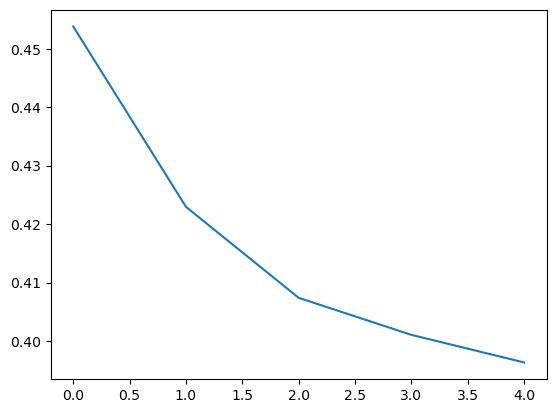

In [12]:
plt.plot(history.history["loss"])
plt.show()